#I am starting to feel like a Rap God, Rap God....
Let's get started with text generation by importing all libraries needed.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

#Importing data

In [4]:
# Define path for file with LYRIC
EMINEM_LYRIC = '/content/drive/MyDrive/My projects/Eminem Rap Generator/ eminem song lyrics.txt'

# Read the data
with open('/content/drive/MyDrive/My projects/Eminem Rap Generator/ eminem song lyrics.txt') as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of lyrics\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 1739 lines of lyrics

The first 5 lines look like this:

"look, i was gonna go easy on you not to hurt your feelings"
"but i'm only going to get this one chance" (six minutes— six minutes—)
"something's wrong, i can feel it" (six minutes, slim shady, you're on!)
"just a feeling i've got, like something's about to happen, but i don't know what. 
if that means what i think it means, we're in trouble, big trouble; 


## Tokenizing the text

Now fit the Tokenizer to the corpus and save the total number of words.

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [6]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[156, 2, 64, 49, 35, 557, 14, 3, 34, 5, 376, 16, 1140]

## Generating n_grams

Now complete the `n_gram_seqs` function below. This function receives the fitted tokenizer and the corpus (which is a list of strings) and should return a list containing the `n_gram` sequences for each line in the corpus:

In [7]:
# GRADED FUNCTION: n_gram_seqs
def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary

    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    ### START CODE HERE
    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

    ### END CODE HERE

    return input_sequences

In [8]:
# Test your function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[156, 2],
 [156, 2, 64],
 [156, 2, 64, 49],
 [156, 2, 64, 49, 35],
 [156, 2, 64, 49, 35, 557],
 [156, 2, 64, 49, 35, 557, 14],
 [156, 2, 64, 49, 35, 557, 14, 3],
 [156, 2, 64, 49, 35, 557, 14, 3, 34],
 [156, 2, 64, 49, 35, 557, 14, 3, 34, 5],
 [156, 2, 64, 49, 35, 557, 14, 3, 34, 5, 376],
 [156, 2, 64, 49, 35, 557, 14, 3, 34, 5, 376, 16],
 [156, 2, 64, 49, 35, 557, 14, 3, 34, 5, 376, 16, 1140]]

In [9]:
# Test your function with a bigger corpus
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[13, 7],
 [13, 7, 96],
 [13, 7, 96, 723],
 [13, 7, 96, 723, 5],
 [13, 7, 96, 723, 5, 22],
 [13, 7, 96, 723, 5, 22, 21],
 [13, 7, 96, 723, 5, 22, 21, 69],
 [13, 7, 96, 723, 5, 22, 21, 69, 242],
 [13, 7, 96, 723, 5, 22, 21, 69, 242, 279],
 [13, 7, 96, 723, 5, 22, 21, 69, 242, 279, 724],
 [13, 7, 96, 723, 5, 22, 21, 69, 242, 279, 724, 279],
 [13, 7, 96, 723, 5, 22, 21, 69, 242, 279, 724, 279, 724],
 [558, 322],
 [558, 322, 2],
 [558, 322, 2, 65],
 [558, 322, 2, 65, 111],
 [558, 322, 2, 65, 111, 8],
 [558, 322, 2, 65, 111, 8, 279],
 [558, 322, 2, 65, 111, 8, 279, 1141],
 [558, 322, 2, 65, 111, 8, 279, 1141, 56],
 [558, 322, 2, 65, 111, 8, 279, 1141, 56, 70],
 [558, 322, 2, 65, 111, 8, 279, 1141, 56, 70, 47],
 [558, 322, 2, 65, 111, 8, 279, 1141, 56, 70, 47, 14],
 [20, 4],
 [20, 4, 323],
 [20, 4, 323, 136],
 [20, 4, 323, 136, 31],
 [20, 4, 323, 136, 31, 12],
 [20, 4, 323, 136, 31, 12, 558],
 [20, 4, 323, 136, 31, 12, 558, 83],
 [20, 4, 323, 136, 31, 12, 558, 83, 5],
 [20, 4, 323, 136, 31, 

Apply the `n_gram_seqs` transformation to the whole corpus and save the maximum sequence length to use it later:

In [10]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 13597
maximum length of sequences is: 30


## Add padding to the sequences

Now code the `pad_seqs` function which will pad any given sequences to the desired maximum length. Notice that this function receives a list of sequences and should return a numpy array with the padded sequences:

In [11]:
# GRADED FUNCTION: pad_seqs
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    ### START CODE HERE
    padded_sequences = np.array(pad_sequences(input_sequences,maxlen))

    return padded_sequences
    ### END CODE HERE

In [12]:
# Test your function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  156,
           2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  156,    2,
          64],
       [   0,    0,    0,    0,    0,    0,    0,    0,  156,    2,   64,
          49],
       [   0,    0,    0,    0,    0,    0,    0,  156,    2,   64,   49,
          35],
       [   0,    0,    0,    0,    0,    0,  156,    2,   64,   49,   35,
         557],
       [   0,    0,    0,    0,    0,  156,    2,   64,   49,   35,  557,
          14],
       [   0,    0,    0,    0,  156,    2,   64,   49,   35,  557,   14,
           3],
       [   0,    0,    0,  156,    2,   64,   49,   35,  557,   14,    3,
          34],
       [   0,    0,  156,    2,   64,   49,   35,  557,   14,    3,   34,
           5],
       [   0,  156,    2,   64,   49,   35,  557,   14,    3,   34,    5,
         376],
       [ 156,    2,   64,   49,   35,  557,   14,    3,   34,    5,  376,
          16],
       [   2,   64,  

In [13]:
# Test your function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   13,    7],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   13,    7,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   13,    7,   96,  723],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          13,    7,   96,  723,    5],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   13,
           7,   96,  723,    5,   22],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   13,    7,
          96,  723,    5,   22,   21],
       [   0,    0,    0,    0,    0,    0,    0,    0,   13,    7,   96,
         723,    5,   22,   21,   69],
       [   0,    0,    0,    0,    0,    0,    0,   13,    7,   96,  723,
           5,   22,   21,   69,  242],
       [   0,    0,    0,    0,    0,    0,   13,    7,   96,  723,    5,
          22,   21,   

In [14]:
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (13597, 30)


## Split the data into features and labels

Before feeding the data into the neural network you should split it into features and labels. In this case the features will be the padded n_gram sequences with the last word removed from them and the labels will be the removed word.

Complete the `features_and_labels` function below. This function expects the padded n_gram sequences as input and should return a tuple containing the features and the one hot encoded labels.

Notice that the function also receives the total of words in the corpus, this parameter will be very important when one hot enconding the labels since every word in the corpus will be a label at least once. If you need a refresh of how the `to_categorical` function works take a look at the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [15]:
# GRADED FUNCTION: features_and_labels
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams

    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size

    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """
    ### START CODE HERE
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = to_categorical(labels,total_words)
    ### END CODE HERE

    return features, one_hot_labels

In [16]:
# Test your function with the padded n_grams_seq of the first example
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (12, 3084)

features look like this:



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 156,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0, 156,   2,  64],
       [  0,   0,   0,   0,   0,   0,   0, 156,   2,  64,  49],
       [  0,   0,   0,   0,   0,   0, 156,   2,  64,  49,  35],
       [  0,   0,   0,   0,   0, 156,   2,  64,  49,  35, 557],
       [  0,   0,   0,   0, 156,   2,  64,  49,  35, 557,  14],
       [  0,   0,   0, 156,   2,  64,  49,  35, 557,  14,   3],
       [  0,   0, 156,   2,  64,  49,  35, 557,  14,   3,  34],
       [  0, 156,   2,  64,  49,  35, 557,  14,   3,  34,   5],
       [156,   2,  64,  49,  35, 557,  14,   3,  34,   5, 376],
       [  2,  64,  49,  35, 557,  14,   3,  34,   5, 376,  16]],
      dtype=int32)

In [17]:
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (13597, 29)
labels have shape: (13597, 3084)


## Create the model

Now you should define a model architecture capable of achieving an accuracy of at least 80%.

Some hints to help you in this task:

- An appropriate `output_dim` for the first layer (Embedding) is 100, this is already provided for you.
- A Bidirectional LSTM is helpful for this particular problem.
- The last layer should have the same number of units as the total number of words in the corpus and a softmax activation function.
- This problem can be solved with only two layers (excluding the Embedding) so try out small architectures first.

In [19]:
# GRADED FUNCTION: create_model
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model

    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences

    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()
    ### START CODE HERE
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150)))
    model.add(Dense(total_words,activation="softmax"))
    # Compile the model
    #adam = Adam(lr=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

    ### END CODE HERE

    return model

In [20]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=100, verbose=1)

Epoch 1/100
425/425 [==============================] - 62s 136ms/step - loss: 6.7540 - accuracy: 0.0330
Epoch 2/100
425/425 [==============================] - 58s 136ms/step - loss: 6.2005 - accuracy: 0.0462
Epoch 3/100
425/425 [==============================] - 55s 129ms/step - loss: 5.8486 - accuracy: 0.0631
Epoch 4/100
425/425 [==============================] - 56s 132ms/step - loss: 5.4763 - accuracy: 0.0873
Epoch 5/100
425/425 [==============================] - 56s 132ms/step - loss: 5.0854 - accuracy: 0.1227
Epoch 6/100
425/425 [==============================] - 57s 133ms/step - loss: 4.6968 - accuracy: 0.1623
Epoch 7/100
425/425 [==============================] - 56s 131ms/step - loss: 4.3274 - accuracy: 0.2017
Epoch 8/100
425/425 [==============================] - 55s 130ms/step - loss: 3.9873 - accuracy: 0.2371
Epoch 9/100
425/425 [==============================] - 55s 129ms/step - loss: 3.6687 - accuracy: 0.2812
Epoch 10/100
425/425 [==============================] - 55s 131m

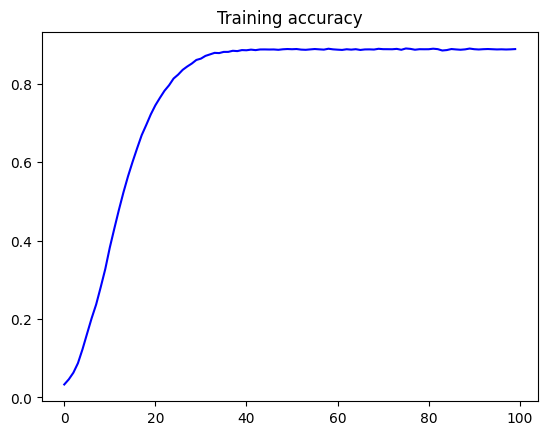

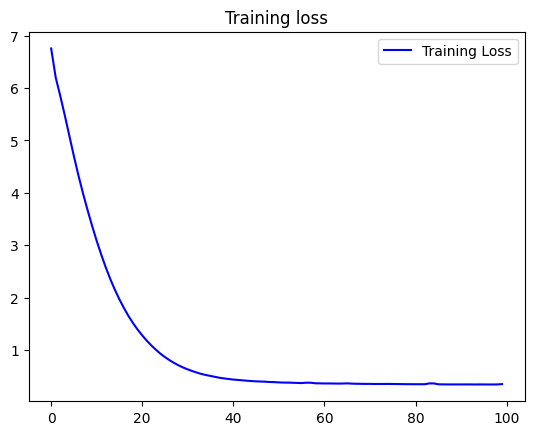

In [21]:
# Looking at the training curves of our model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# See ai-eminem model in action



In [23]:
seed_text = "I am Eminem "
next_words = 100

for _ in range(next_words):
	# Convert the text into sequences
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	# Pad the sequences
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# Get the probabilities of predicting a word
	predicted = model.predict(token_list, verbose=0)
	# Choose the next word based on the maximum probability
	predicted = np.argmax(predicted, axis=-1).item()
	# Get the actual word from the word index
	output_word = tokenizer.index_word[predicted]
	# Append to the current text
	seed_text += " " + output_word

#print(seed_text)
def print_with_newlines(text, line_length):
	rap_word=text.split()
	for i in range(0, len(rap_word), line_length):
				print(rap_word[i:i+line_length])


print_with_newlines(seed_text, 7)


['I', 'am', 'Eminem', 'admit', 'it', 'what', 'i']
['just', 'tied', 'shit', 'to', 'a', 'monster', 'yeah']
['you', 'ever', 'hope', 'you', 'her', 'woo', 'i']
['did', 'it', 'anyway', '50', 'chance', 'six', 'chance']
['name', 'way', 'to', 'get', 'into', 'tomorrow', 'and']
["blisterin'", 'you', 'is', 'you', 'and', "i'm", 'me']
["motherfuckin'", 'the', 'job', 'fan', 'name', 'work', 'plank']
['i', 'live', 'on', 'my', 'bitch', 'yeah', 'i']
['did', 'my', 'daughter', 'then', 'it', 'it', 'about']
['it', 'like', 'you', 'wanna', 'breathe', 'without', 'me']
['me', 'and', 'you', 'know', 'me', 'is', 'you']
['yeah', 'woo', "you're", 'so', 'any', 'chances', 'than']
['the', 'slim', 'yeah', 'i', "didn't", 'really', 'even']
['care', 'of', 'it', 'was', 'a', 'half', 'of']
['me', 'like', 'full', 'individuals', 'in']
